**Importing Data-set and Data analysis**

In [ ]:
# Libraries
import urllib, json
import pandas as pd
df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')

In [ ]:
df.head()

,rating,year,imdbid,title,id
0,0,1874,3155794,Passage de Venus,9602
1,0,1877,14495706,La Rosace Magique,9804
2,0,1878,2221420,Sallie Gardner at a Gallop,9603
3,0,1878,12592084,Le singe musicien,9806
4,0,1881,7816420,Athlete Swinging a Pick,9816


In [ ]:
# filter movies after 1967
dfNew = df[df['year']>=1967]

In [ ]:
dfNew.head()

,rating,year,imdbid,title,id
1220,1,1967,0061512,Cool Hand Luke,301
1221,1,1967,0061852,"Jungle Book, The",493
1222,2,1967,0061722,"Graduate, The",616
1223,1,1967,0063278,Marketa Lazarova,2054
1224,3,1967,0061418,Bonnie and Clyde,2083


In [ ]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8111 entries, 1220 to 9330
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  8111 non-null   int64 
 1   year    8111 non-null   int64 
 2   imdbid  8111 non-null   object
 3   title   8111 non-null   object
 4   id      8111 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 380.2+ KB


In [ ]:
dfNew.rename(columns={'rating':'Bechdel Score'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dfNew.head()

,Bechdel Score,year,imdbid,title,id
1220,1,1967,0061512,Cool Hand Luke,301
1221,1,1967,0061852,"Jungle Book, The",493
1222,2,1967,0061722,"Graduate, The",616
1223,1,1967,0063278,Marketa Lazarova,2054
1224,3,1967,0061418,Bonnie and Clyde,2083


In [ ]:
dfNew['year'] = pd.to_datetime(dfNew['year'], format='%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfNew['Bechdel Score'] = dfNew['Bechdel Score'].astype('category',copy=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

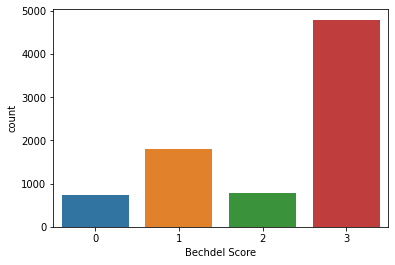

In [ ]:
sns.countplot(x='Bechdel Score',data=dfNew)

In [ ]:
li = []
for i in dfNew['Bechdel Score']:
    if(i<3):
        li.append(0)
    else:
        li.append(1)
dfNew['pass_test'] = li

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


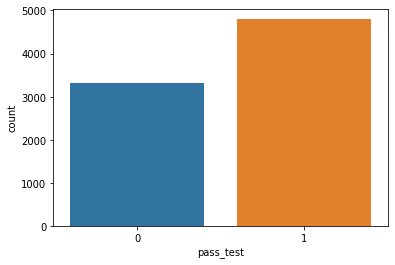

In [ ]:
sns.countplot(x='pass_test',data=dfNew)

In [ ]:
# imports
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline() 
py.init_notebook_mode() 

In [ ]:
df_by_date = dfNew.loc[dfNew['year'].sort_values().index]
by_date = df_by_date.groupby('year').year.count()
by_date.iplot(kind='scatter', title='Number of movies with year',name='rating')

In [ ]:
from plotnine import *

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



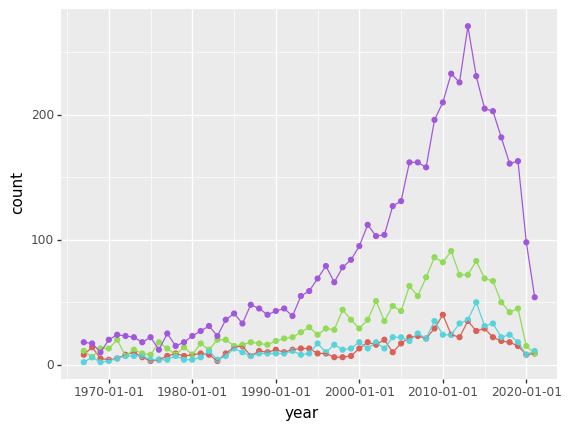

<ggplot: (8779078424729)>

In [ ]:
(ggplot(dfNew)+geom_point(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False)+geom_line(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False))

In [27]:
imdb = pd.read_csv('movies.csv')
imdbNew = imdb[['title','rating']]
dfNew = pd.merge(dfNew, imdbNew, how='left', left_on=['title'], right_on=['title'])
dfNew.head()

,Bechdel Score,year,imdbid,title,id,pass_test,rating
0,1,1967-01-01,0061512,Cool Hand Luke,301,0,8.2
1,1,1967-01-01,0061852,"Jungle Book, The",493,0,7.5
2,1,1967-01-01,0061852,"Jungle Book, The",493,0,5.9
3,2,1967-01-01,0061722,"Graduate, The",616,0,8.2
4,1,1967-01-01,0063278,Marketa Lazarova,2054,0,NaN


In [28]:
# Dropping rows with null values:
dfNew = dfNew.dropna()
dfNew = dfNew.drop('id',axis=1)
# Creating a new dataframe with only year, Bechdel scores, and imdb rating:
new = dfNew.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()
new.head()

,year,Bechdel Score,rating
0,1967-01-01,0,7.700000
1,1967-01-01,1,7.125000
2,1967-01-01,2,6.750000
3,1967-01-01,3,6.658333
4,1968-01-01,0,7.262500


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning:

Confidence intervals are not yet implementedfor lowess smoothings.

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 2 rows containing missing values.



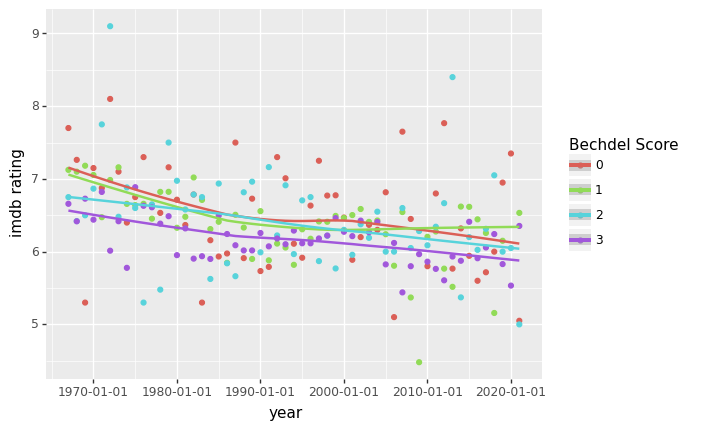

<ggplot: (8779067553897)>

In [29]:
# Plot Bechdel Score against imdb rating:
ggplot(new,aes(x='year',y='rating',color='Bechdel Score'))+ geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating")+labs( colour='Bechdel Score' )

In [32]:
pip install gender-guesser

     |████████████████████████████████| 379 kB 5.0 MB/s 


In [33]:
import gender_guesser.detector as gen
latest = pd.read_csv('movielatest.csv',encoding = "latin")
dfLatest = latest[['name','director']]
dfLatest.rename(columns={'name':'title'}, inplace=True)
dfLatest = pd.merge(dfNew, dfLatest, how='left', left_on=['title'], right_on=['title'])
dfLatest = dfLatest.dropna()
dfLatest.head()

,Bechdel Score,year,imdbid,title,pass_test,rating,director
7,2,1967-01-01,0061452,Casino Royale,0,5.3,Martin Campbell
11,3,1967-01-01,0061391,Bedazzled,1,6.8,Harold Ramis
12,3,1967-01-01,0061391,Bedazzled,1,5.9,Harold Ramis
24,1,1968-01-01,0063442,Planet of the Apes,0,7.9,Tim Burton
25,1,1968-01-01,0063442,Planet of the Apes,0,5.6,Tim Burton


In [34]:
# Predicting gender of director from first name:
d = gen.Detector()
genders = []
firstNames = dfLatest['director'].str.split().str.get(0)
for i in firstNames[0:len(firstNames)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')
dfLatest['gender'] = genders
dfLatest = dfLatest[dfLatest['gender'] != 'unknown']
# Encode the variable gender into a new dataframe:
dfLatest['Male'] = dfLatest['gender'].map( {'male':1, 'female':0} )
dfLatest.head()

,Bechdel Score,year,imdbid,title,pass_test,rating,director,gender,Male
7,2,1967-01-01,0061452,Casino Royale,0,5.3,Martin Campbell,male,1
11,3,1967-01-01,0061391,Bedazzled,1,6.8,Harold Ramis,male,1
12,3,1967-01-01,0061391,Bedazzled,1,5.9,Harold Ramis,male,1
24,1,1968-01-01,0063442,Planet of the Apes,0,7.9,Tim Burton,male,1
25,1,1968-01-01,0063442,Planet of the Apes,0,5.6,Tim Burton,male,1


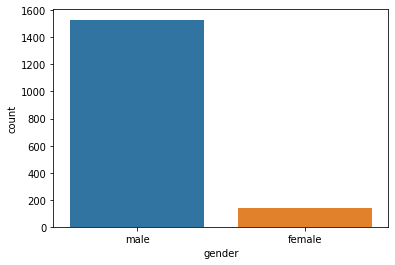

In [35]:
# Visualize gender:
sns.countplot(x='gender',data=dfLatest)

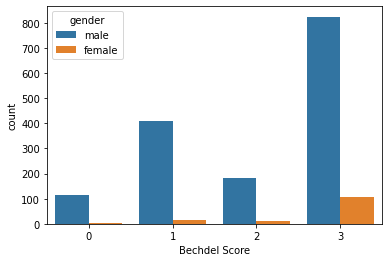

In [36]:
# Visualize gender with Bechdel Score:
sns.countplot(x='Bechdel Score',hue='gender',data=dfLatest)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



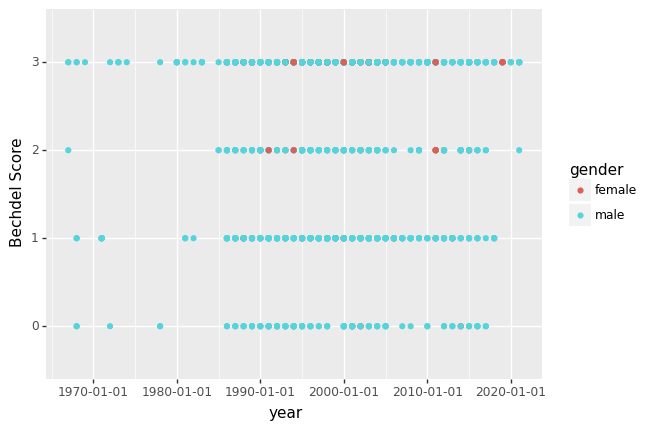

<ggplot: (8779065155705)>

In [37]:
ggplot(aes(x = 'year', y = 'Bechdel Score',color='gender'), data = dfLatest)+geom_point()

In [38]:
# Add variable budget:
dfLatest['budget']=latest['budget']

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



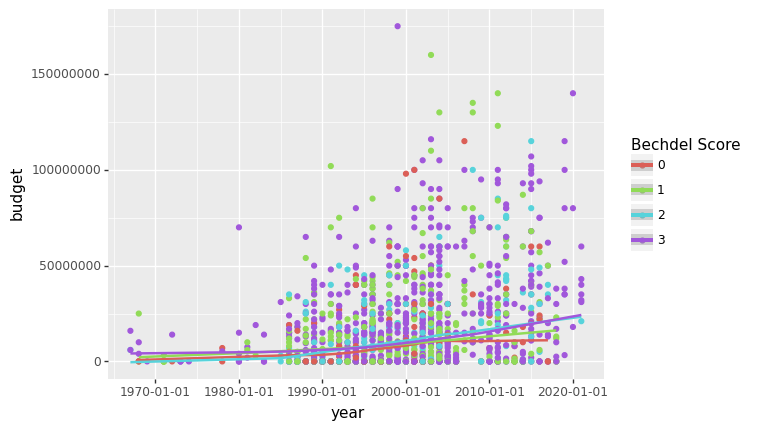

<ggplot: (8779065157477)>

In [39]:
# Visualize budget and Bechdel score:
ggplot(aes(x='year', y='budget',color='Bechdel Score'), data = dfLatest)+geom_point()+geom_smooth()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



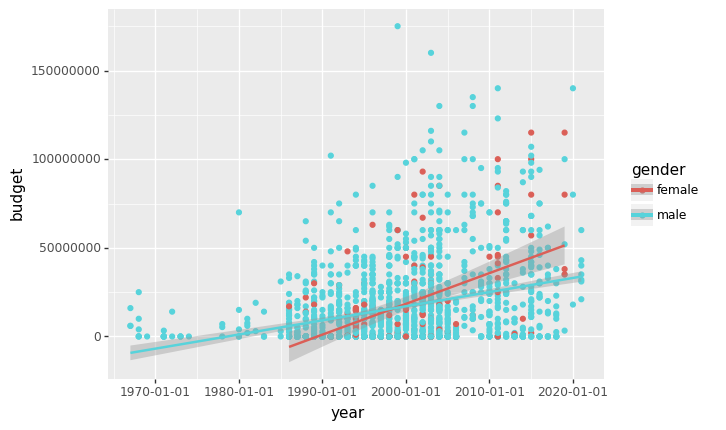

<ggplot: (8779065026849)>

In [40]:
# Visualize budget and gender of director
ggplot(aes(x = 'year', y = 'budget',color='gender'), data = dfLatest)+geom_point()+geom_smooth()

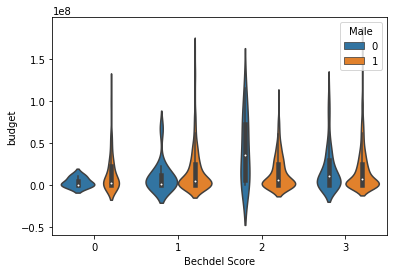

In [41]:
# Visualize budget, score, and gender
sns.violinplot(x='Bechdel Score',y='budget',hue='Male',data=dfLatest)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



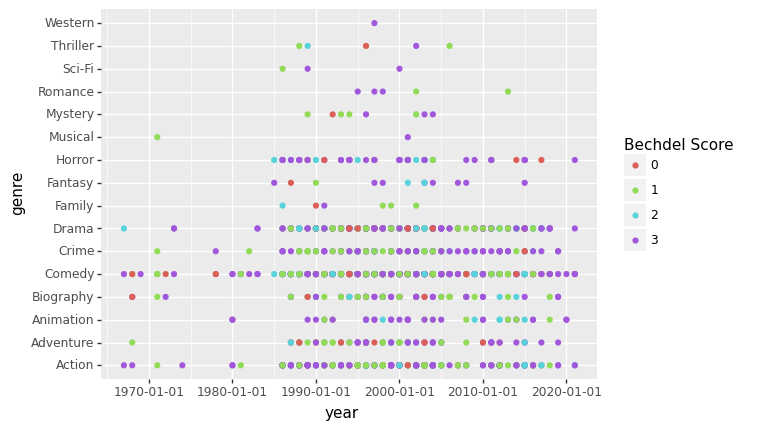

<ggplot: (8779064978625)>

In [42]:
# Visualize genre and Bechdel score
dfLatest['genre'] = latest['genre']
ggplot(aes(x = 'year', y = 'genre',color='Bechdel Score'), data = dfLatest)+geom_point()

In [43]:
# Visualize movie grossing, gender, and Bechdel score:
dfLatest['gross'] = latest['gross']

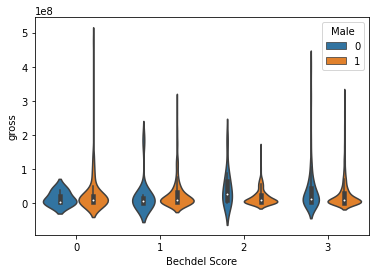

In [44]:
# Movie grossing with Bechdel score and gender:
sns.violinplot(x='Bechdel Score',y='gross',hue='Male',data=dfLatest)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



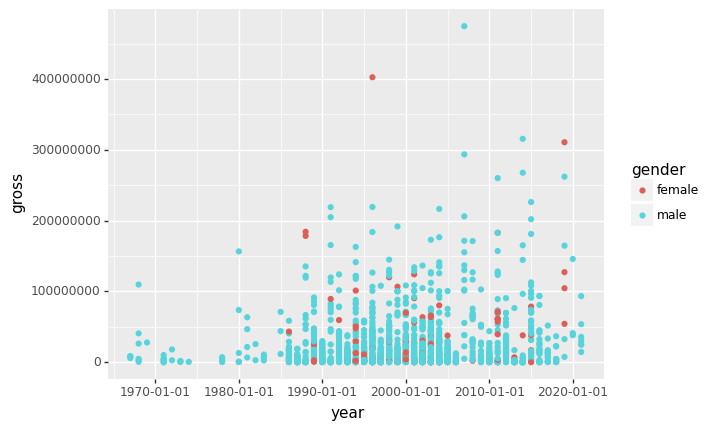

<ggplot: (8779064781577)>

In [45]:
# Movie grossing with year and gender:
ggplot(aes(x = 'year', y = 'gross',color='gender'), data = dfLatest)+geom_point()